### *ONLINE IMAGE TO TEXT CONVERSION AND EXTRACTION*
* 1) Problem Statement: The objective is to build a CNN-based OCR model that can accurately extract text from images
* 2) Data Collection
* 3) Data Preprocessing
* 4) Exploratory Data Analysis (EDA)
* 5) Model Development
* 6) Model Training
* 7) Evaluation and Analysis
* 8) Model Optimization
* 9) creating a Predictive system (demo)

In [83]:
#import all libraries to used in the project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [84]:
# Load the MNIST dataset repo for providing data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to be values between 0 and 1 doining transformation
train_images = train_images / 255.0
test_images = test_images / 255.0

# Print the shape of the data
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


In [85]:
# Create an ImageDataGenerator instance with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate images by a random degree between -10 and 10
    width_shift_range=0.1,  # Shift images horizontally by a fraction of total width
    height_shift_range=0.1, # Shift images vertically by a fraction of total height
    shear_range=0.2,        # Shear intensity (angle in counter-clockwise direction)
    zoom_range=0.2,         # Zoom images by a random factor between 0.8 and 1.2
    horizontal_flip=True,   # Flip images horizontally
    vertical_flip=False     # Do not flip images vertically

    #Playing arround with images and to check them
)


In [86]:

# Reshape the data to 4D tensor (batch_size, height, width, channels) for ImageDataGenerator
train_images_reshaped = train_images.reshape(train_images.shape[0], 28, 28, 1)

# Fit the ImageDataGenerator on the training data
datagen.fit(train_images_reshaped)

# Create an iterator to generate augmented images
augmented_images_iterator = datagen.flow(train_images_reshaped, train_labels, batch_size=32)


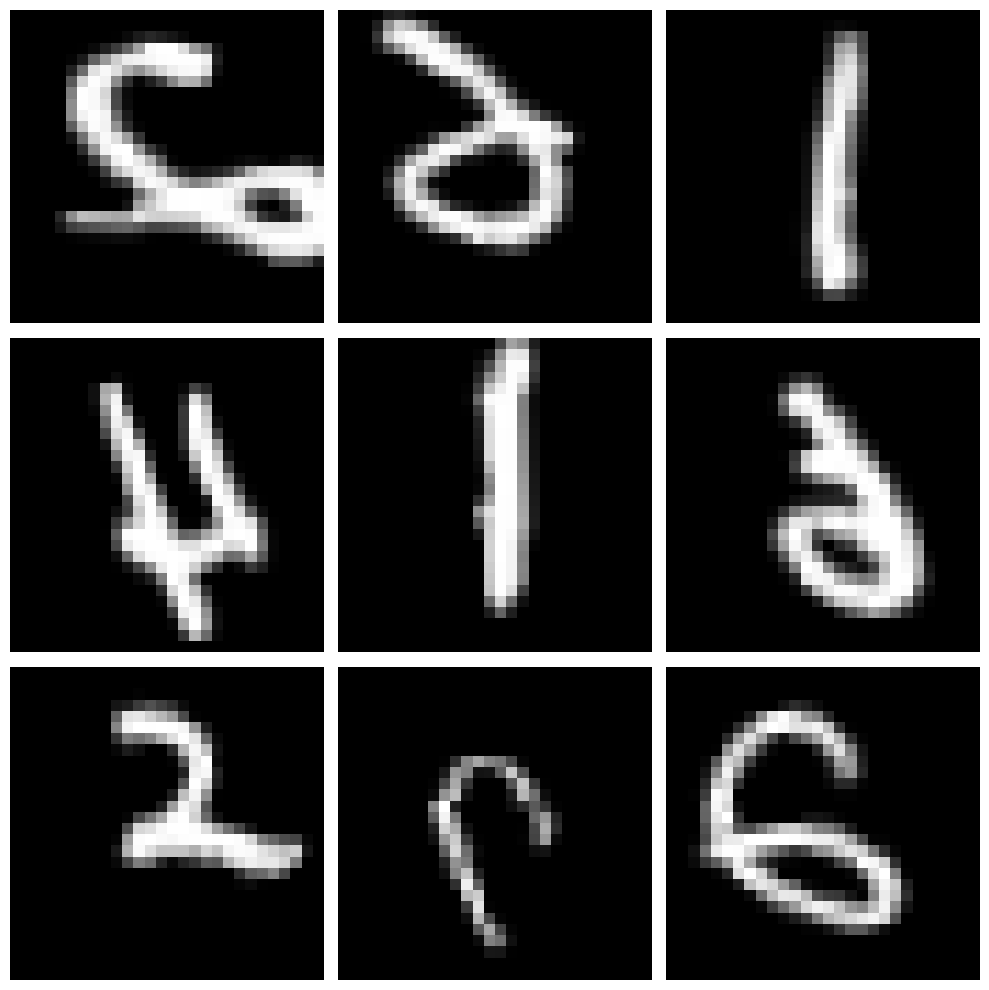

In [87]:
# Generate and visualize augmented images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    batch = augmented_images_iterator.next()
    image = batch[0][0].reshape(28, 28)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [88]:
# Flatten the images for easier analysis
train_images_flat = train_images.reshape(train_images.shape[0], -1)


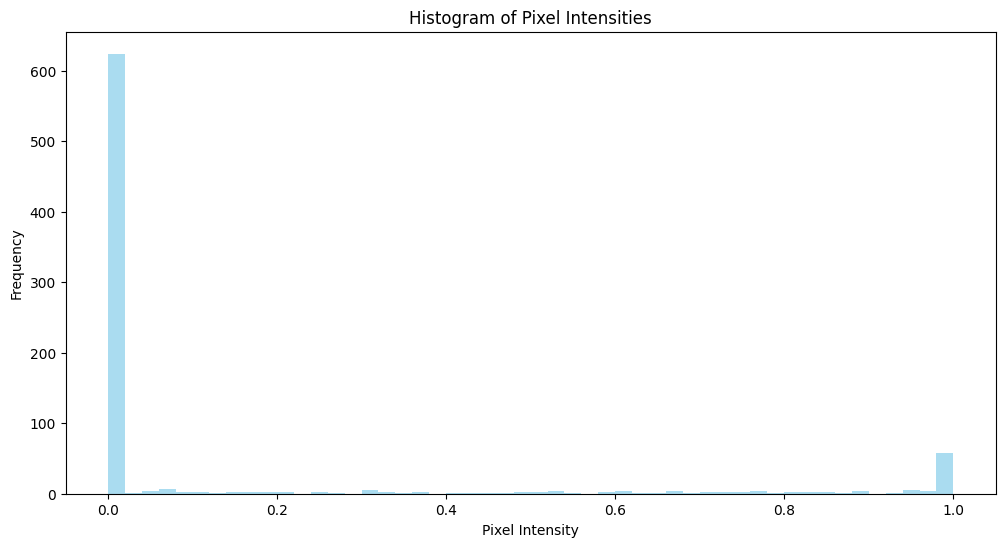

In [89]:
# 1. Histogram of Pixel Intensities
plt.figure(figsize=(12, 6))
plt.hist(train_images_flat[0], bins=50, color='skyblue', alpha=0.7)
plt.title('Histogram of Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

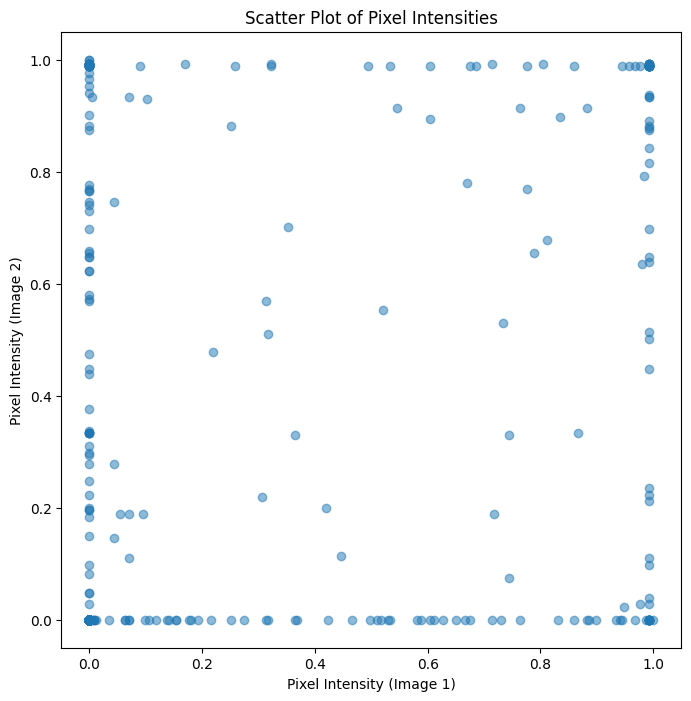

In [90]:
#  Scatter Plot of Pixel Intensities
plt.figure(figsize=(8, 8))
plt.scatter(train_images_flat[0], train_images_flat[1], alpha=0.5)
plt.title('Scatter Plot of Pixel Intensities')
plt.xlabel('Pixel Intensity (Image 1)')
plt.ylabel('Pixel Intensity (Image 2)')
plt.show()

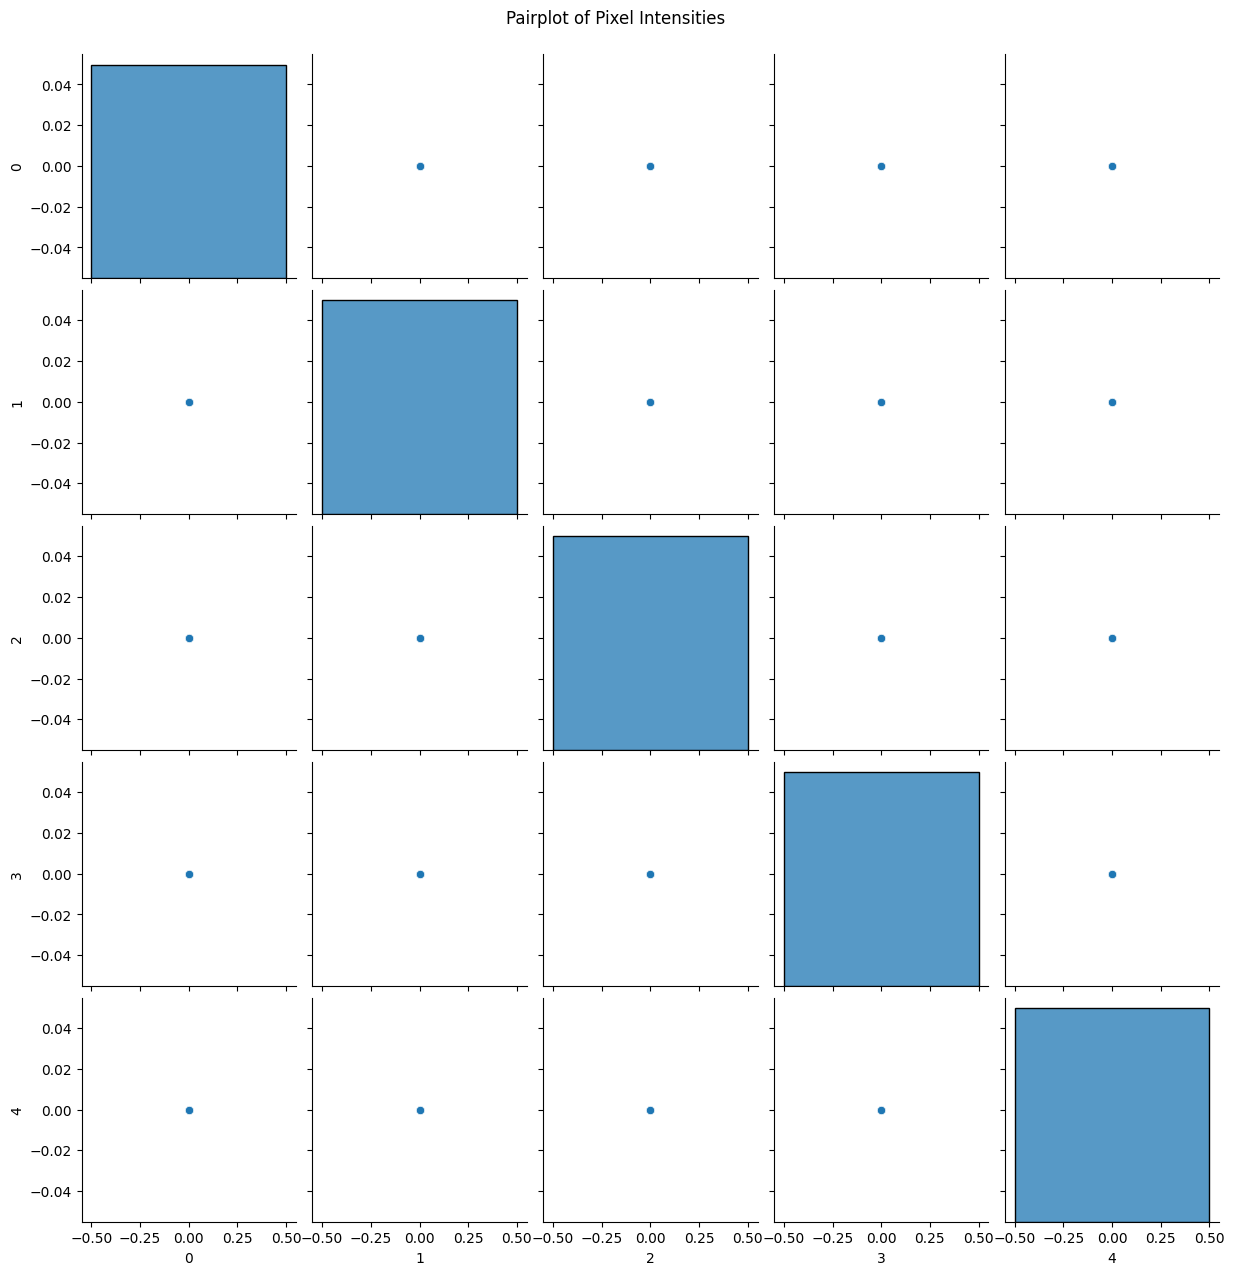

In [91]:
# Pairplot of Pixel Intensities
sns.pairplot(pd.DataFrame(train_images_flat[:, :5]))
plt.suptitle('Pairplot of Pixel Intensities', y=1.02)
plt.show()

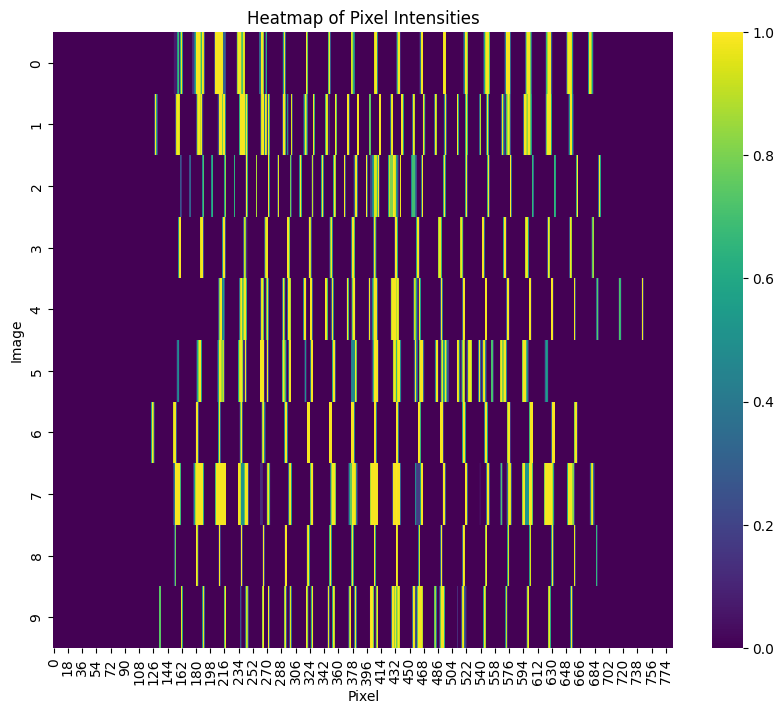

In [92]:
# Heatmap of Pixel Intensities corellation in the data
plt.figure(figsize=(10, 8))
sns.heatmap(train_images_flat[:10], cmap='viridis')
plt.title('Heatmap of Pixel Intensities')
plt.xlabel('Pixel')
plt.ylabel('Image')
plt.show()

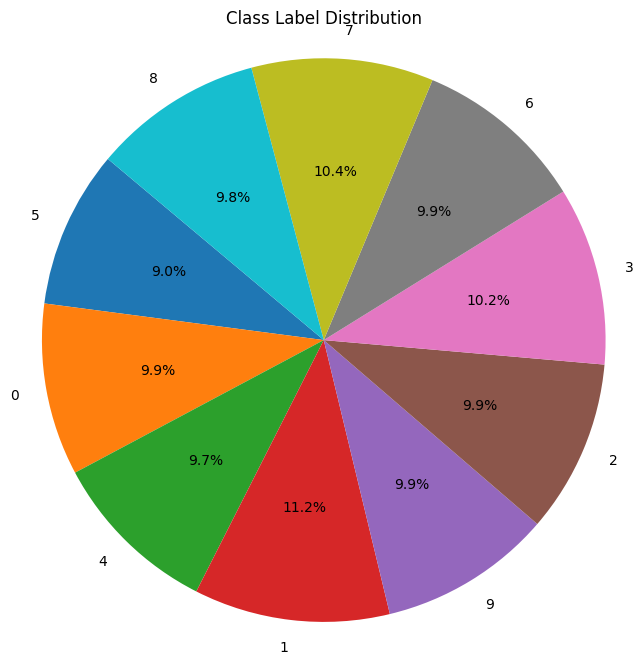

In [93]:
# Pie Chart of Class Label Distribution
class_counts = dict(Counter(train_labels))
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Class Label Distribution')
plt.axis('equal')
plt.show()

In [94]:

# Split the data into training and testing sets  test_size=0.2 20 % for test and 80 % for train
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training Images Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Images Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)


Training Images Shape: (48000, 28, 28)
Training Labels Shape: (48000,)
Testing Images Shape: (12000, 28, 28)
Testing Labels Shape: (12000,)


In [95]:
# Build the CNN model arranging the layers of the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [96]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [97]:

# Define the EarlyStopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=3, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/3
1500/1500 [==============================] - 58s 38ms/step - loss: 0.1475 - accuracy: 0.9544 - val_loss: 0.0545 - val_accuracy: 0.9837
Epoch 2/3
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.0429 - val_accuracy: 0.9879
Epoch 3/3
375/375 [==============================] - 4s 10ms/step - loss: 0.0391 - accuracy: 0.9879
Test Loss: 0.03914752975106239
Test Accuracy: 0.9879166483879089


In [98]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Perform predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))


375/375 [==============================] - 5s 12ms/step - loss: 0.0391 - accuracy: 0.9879
Test Loss: 0.03914752975106239
Test Accuracy: 0.9879166483879089
375/375 [==============================] - 4s 10ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      1.00      0.99      1322
           2       0.99      0.99      0.99      1174
           3       1.00      0.98      0.99      1219
           4       0.99      0.99      0.99      1176
           5       0.98      0.99      0.99      1104
           6       0.99      0.99      0.99      1177
           7       0.99      0.99      0.99      1299
           8       0.99      0.98      0.99      1160
           9       0.98      0.99      0.98      1194

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000


Confu

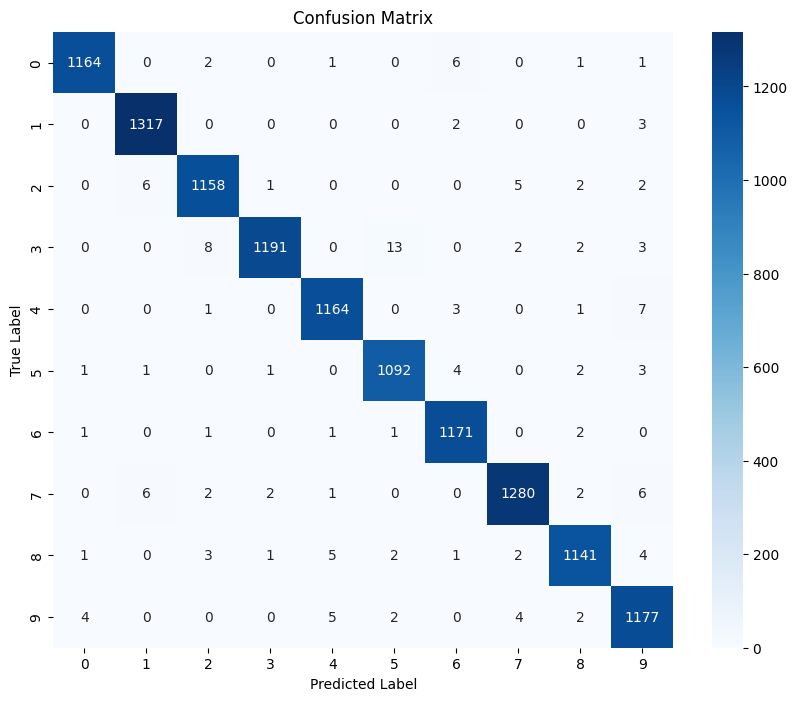

In [99]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [100]:

# using Gemini Pro with LangChain on Google AI Studio
# I will first install python libs
!pip -q install langchain_experimental langchain_core
!pip -q install google-generativeai==0.3.1
!pip -q install google-ai-generativelanguage==0.4.0
!pip -q install langchain-google-genai
!pip -q install "langchain[docarray]"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-google-genai 1.0.3 requires google-generativeai<0.6.0,>=0.5.2, but you have google-generativeai 0.3.1 which is incompatible.


In [101]:
#Check The model specification
!pip show langchain langchain-core

Name: langchain
Version: 0.1.17
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, dataclasses-json, jsonpatch, langchain-community, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-experimental
---
Name: langchain-core
Version: 0.1.48
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: jsonpatch, langsmith, packaging, pydantic, PyYAML, tenacity
Required-by: langchain, langchain-community, langchain-experimental, langchain-google-genai, langchain-text-splitters


In [102]:
#@title Setting up the Auth
import os
import google.generativeai as genai
from google.colab import userdata
from google.colab import userdata


In [103]:
API_KEY=userdata.get('GOOGLE_API_KEY')

from IPython.display import display
from IPython.display import Markdown

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

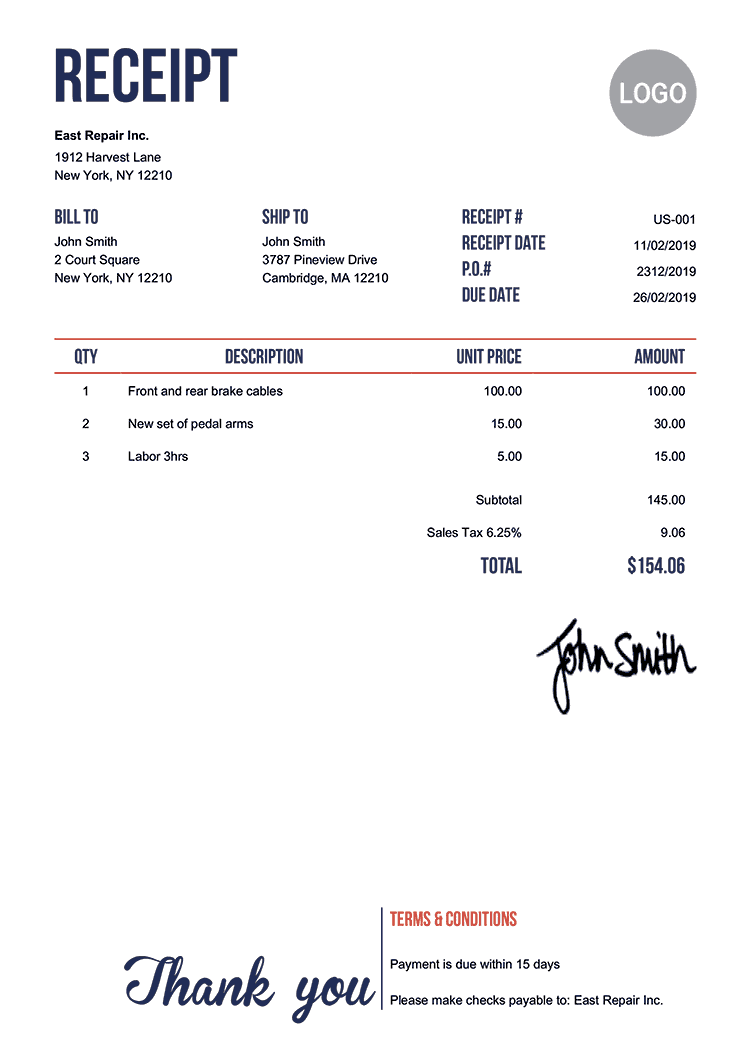

In [104]:
import requests
from IPython.display import Image

image_url = "https://templates.invoicehome.com/receipt-template-us-neat-750px.png"
content = requests.get(image_url).content
Image(content,width=300)

In [105]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")

# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What is the image showing ??",
        },
        {
            "type": "image_url",
            "image_url": image_url
         },
    ]
)

llm.invoke([message])

AIMessage(content=" The image shows a receipt from East Repair Inc. The receipt is dated November 2, 2019, and is made out to John Smith. The receipt lists the parts and labor that were used to repair Smith's vehicle. The total cost of the repair is $154.06.", response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-38279c56-e4fd-4563-8e6c-13f2ec8f0875-0')

In [106]:
!pip install streamlit

In [112]:
!wget -q -O - ipv4.icanhazip.com

104.154.151.229


In [113]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.154.151.229:8501

npx: installed 22 in 2.548s
your url is: https://hip-crews-thank.loca.lt
2024-05-01 09:03:47.979 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 584, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 31, in <module>
    image_url = f"data:image/png;base64,{img_bytes.decode()}"
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
2024-05-01 09:18:37.179 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 584, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 24, in <module>
    image = Image.open(BytesIO(content))
  File "/usr/local/lib